# Linear Regression in Statsmodels (Practice)

In [24]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
# load data
df = pd.read_csv("C:\\Users\\hamma\\Documents\\DataEnrichment\\Lessons\\Linear-Regression-in-Statsmodels--Practice-\\CarPrice_Assignment.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

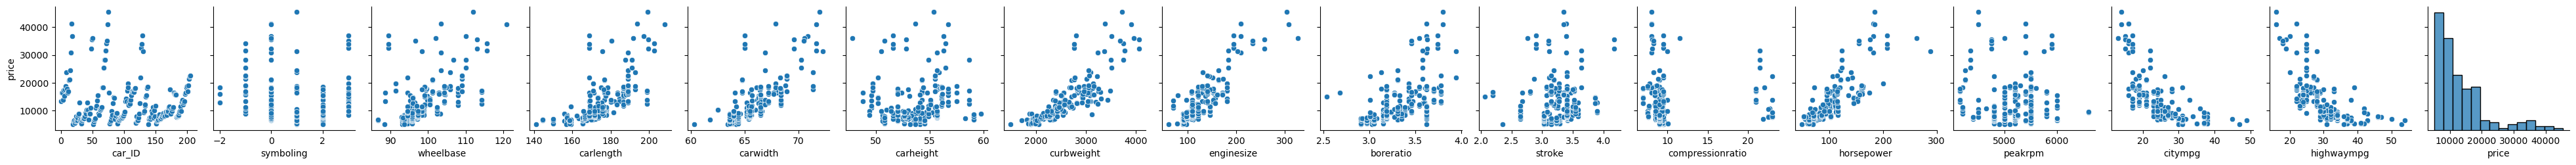

In [4]:
sns.pairplot(df,y_vars='price');

In [5]:
# feature matrix and target
y = df['price']
X = df.drop(columns='price').copy()

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,four,103,idi,2.99,3.47,21.9,55,4800,45,50
173,174,-1,toyota corolla,gas,std,four,sedan,fwd,front,102.4,...,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34
93,94,1,nissan titan,gas,std,four,wagon,fwd,front,94.5,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
167,168,2,toyota corona liftback,gas,std,two,hardtop,rwd,front,98.4,...,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30


In [7]:
cat_select = make_column_selector(dtype_include='object')
num_select = make_column_selector(dtype_include='number')
cat_cols = cat_select(X_train)
num_cols = num_select(X_train)

In [8]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['car_ID', 'symboling', 'wheelbase',
                                  'carlength', 'carwidth', 'carheight',
                                  'curbweight', 'enginesize', 'boreratio',
                                  'stroke', 'compressionratio', 'horsepower',
                                  'peakrpm', 'citympg', 'highwaympg'])])

In [9]:
# fit column transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['car_ID', 'symboling', 'wheelbase',
                                  'carlength', 'carwidth', 'carheight',
                                  'curbweight', 'enginesize', 'boreratio',
                                  'stroke', 'compressionratio', 'horsepower',
                                  'peakrpm', 'citympg', 'highwaympg'])])

In [10]:
# Explore output as df
pd.DataFrame(preprocessor.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.7,3139.0,181.0,3.43,3.27,9.0,160.0,5200.0,19.0,25.0
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,1938.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,3016.0,171.0,3.27,3.35,9.3,161.0,5200.0,19.0,24.0


In [11]:
final_features = []

In [12]:
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [13]:
# slice out encoder
ohe_step = preprocessor.named_transformers_['pipeline-1'][-1]
ohe_step

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [14]:
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_Nissan versa', 'CarName_alfa-romero Quadrifoglio',
       'CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 4000',
       'CarName_audi 5000', 'CarName_audi fox', 'CarName_bmw 320i',
       'CarName_bmw x1', 'CarName_bmw x3', 'CarName_bmw z4',
       'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skyhawk',
       'CarName_buick skylark', 'CarName_chevrolet vega 2300',
       'CarName_dodge challenger se', 'CarName_dodge colt (sw)',
       'CarName_dodge coronet custom', 'CarName_dodge d200',
       'CarName_dodge dart custom', 'CarName_dodge rampage',
       'CarName_honda accord', 'CarName_honda accord cvcc',
       'CarName_honda accord lx', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1500 gl',
       'CarName_honda civic cvcc', 'CarName_honda prelude',
       'CarName_isuzu D-Max ', 'CarName_isuzu MU-X'

In [15]:
# add feature names to empty list
final_features.extend(cat_features)
final_features.extend(num_cols)

In [16]:
# Transform X_train, X_test dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train), columns=final_features,
                         index=X_train.index)
X_train_df.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0


In [17]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features,
                        index=X_test.index)
X_test_df

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.7,3230.0,209.0,3.62,3.390,8.00,182.0,5400.0,16.0,22.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,3053.0,131.0,3.13,3.400,7.00,160.0,5500.0,16.0,22.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.7,2302.0,120.0,3.33,3.470,8.50,97.0,5200.0,27.0,34.0
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.1,2658.0,121.0,3.54,3.070,9.31,110.0,5250.0,21.0,28.0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.7,3750.0,183.0,3.58,3.640,21.50,123.0,4350.0,22.0,25.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.3,2028.0,97.0,3.15,3.290,9.40,69.0,5200.0,31.0,37.0
159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.8,2275.0,110.0,3.27,3.350,22.50,56.0,4500.0,38.0,47.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.8,2140.0,98.0,3.19,3.030,9.00,70.0,4800.0,28.0,34.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.0,2455.0,108.0,3.62,2.640,9.00,94.0,5200.0,25.0,31.0
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.7,2261.0,97.0,3.01,3.400,23.00,52.0,4800.0,37.0,46.0


In [19]:
# add a constant
sm.add_constant(X_train_df, prepend=False, has_constant='add').head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0,1.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0,1.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,1.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0,1.0


In [20]:
# Override dfs
X_train_df = sm.add_constant(X_train_df,has_constant='add',prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add',prepend=False)

In [21]:
# instantiate model
model = sm.OLS(y_train,X_train_df,hasconst=True)

In [22]:
# fit model
result = model.fit()

In [23]:
# get metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     17.02
Date:                Tue, 16 May 2023   Prob (F-statistic):            0.00229
Time:                        22:40:40   Log-Likelihood:                -1114.2
No. Observations:                 153   AIC:                             2524.
Df Residuals:                       5   BIC:                             2973.
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_Nissan versa                     1113.7348   5907.738      0.189      0.858   -1.41e+04    1.63e+04
CarName_alfa-romero Quadrifoglio         2.927e+04    1.9e+04      1.540      0.184   -1.96e+04    7.81e+04
CarName_alfa-romero giulia               2.698e+04   2.24e+04      1.205      0.282   -3.06e+04    8.45e+04
CarName_alfa-romero stelvio               2.97e+04   2.22e+04      1.338      0.238   -2.73e+04    8.67e+04
CarName_audi 100 ls                      3.036e+04   2.08e+04      1.459      0.204   -2.31e+04    8.39e+04
CarName_audi 100ls                       2720.5538   5730.270      0.475      0.655    -1.2e+04    1.75e+04
CarName_audi 4000                        4181.2659   7761.753      0.539      0.613   -1.58e+04    2.41e+04
CarName_audi 5000                        4118.5083   6275.878      0.656      0.541    -1.2e+04    2.03e+04
CarName_audi fox                         4946.8987   1.18e+04      0.418      0.693   -2.55e+04    3.54e+04
CarName_bmw 320i                         3.419e+04   1.98e+04      1.729      0.144   -1.66e+04     8.5e+04
CarName_bmw x1                           4.618e+04   2.14e+04      2.162      0.083   -8734.026    1.01e+05
CarName_bmw x3                            4.58e+04   2.16e+04      2.117      0.088   -9805.544    1.01e+05
CarName_bmw z4                           4.374e+04   2.29e+04      1.908      0.115   -1.52e+04    1.03e+05
CarName_buick opel isuzu deluxe          1624.9580   8040.005      0.202      0.848    -1.9e+04    2.23e+04
CarName_buick regal sport coupe (turbo)  1.384e+04   1.07e+04      1.295      0.252   -1.36e+04    4.13e+04
CarName_buick skyhawk                   -2774.8773   1.31e+04     -0.212      0.840   -3.64e+04    3.08e+04
CarName_buick skylark                   -7205.3271   6754.101     -1.067      0.335   -2.46e+04    1.02e+04
CarName_chevrolet vega 2300              1.902e+04   1.51e+04      1.261      0.263   -1.97e+04    5.78e+04
CarName_dodge challenger se              1.977e+04   1.45e+04      1.362      0.231   -1.76e+04    5.71e+04
CarName_dodge colt (sw)                  1.719e+04   1.62e+04      1.059      0.338   -2.45e+04    5.89e+04
CarName_dodge coronet custom             1.758e+04   1.71e+04      1.031      0.350   -2.63e+04    6.14e+04
CarName_dodge d200                       1.995e+04   1.72e+04      1.159      0.299   -2.43e+04    6.42e+04
CarName_dodge dart custom                2.071e+04   1.57e+04      1.315      0.246   -1.98e+04    6.12e+04
CarName_dodge rampage                    1.755e+04   1.41e+04      1.244      0.269   -1.87e+04    5.38e+04
CarName_honda accord                     1.741e+04   1.67e+04      1.046      0.344   -2.54e+04    6.02e+04
CarName_honda accord cvcc                1.574e+04   1.48e+

In [26]:
# save test predictions
preds = result.predict(X_test_df)
r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
print(r2)
print(mse)

-2.4061629448248905
230459407.38960373
